In [1]:
#Install packages
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


In [6]:
#Import packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,roc_curve, auc
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Buat dataframe
df= pd.read_csv('/content/drive/My Drive/dataset_fp/train_philusiil.csv')
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,8062709.txt,https://neighborly-zippy-wildebeest.glitch.me/...,58,neighborly-zippy-wildebeest.glitch.me,37,0,me,22.666667,0.323529,0.003638,...,0,0,0,1.000000,1.0,0.0,1,0.0,2,0
1,mw98336.txt,http://www.vr9519.club,22,www.vr9519.club,15,0,club,60.881543,1.000000,0.000623,...,0,0,0,2.055227,0.0,0.0,0,0.0,0,0
2,7968412.txt,https://project1e-a5580.web.app/,31,project1e-a5580.web.app,23,0,app,61.090107,0.631579,0.001502,...,0,0,0,0.000000,0.0,0.0,0,0.0,3,0
3,mw209690.txt,http://www.polibarral.pt,24,www.polibarral.pt,17,0,pt,70.414201,1.000000,0.001536,...,0,0,0,0.000000,0.0,0.0,0,NaN,0,0
4,8086841.txt,https://occideautos.decorinaautos1.repl.co/,43,occideautos.decorinaautos1.repl.co,34,0,co,29.945625,0.483871,0.005977,...,0,0,0,0.000000,0.0,0.0,0,0.0,3,0


In [8]:
#check kolom dan features
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [9]:
# Get the list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:")
for col in categorical_cols:
    print(col)

Categorical Columns:
FILENAME
URL
Domain
TLD
Title


In [10]:
# Daftar kolom kategorikal yang ingin diubah
categorical_cols = ['FILENAME', 'URL', 'Domain', 'TLD', 'Title']

# Dictionary untuk menyimpan mapping
mappings = {}

# Enumerasi setiap kolom kategorikal
for col in categorical_cols:
    df[col], enum = pd.factorize(df[col])
    mappings[col] = enum
    # Simpan mapping ke file CSV
    enum_series = pd.Series(enum)
    enum_series.to_csv(f"{col.lower()}_mapping.csv", index=True, header=False)

# Simpan dataframe hasil ke CSV
df.to_csv("data_numerik.csv", index=False)

print("Semua kolom kategorikal berhasil dienumerasi dan disimpan.")

Semua kolom kategorikal berhasil dienumerasi dan disimpan.


In [11]:
df.head(20)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,0,0,58,0,37,0,0,22.666667,0.323529,0.003638,...,0,0,0,1.000000,1.000000,0.0,1,0.0,2,0
1,1,1,22,1,15,0,1,60.881543,1.000000,0.000623,...,0,0,0,2.055227,0.000000,0.0,0,0.0,0,0
2,2,2,31,2,23,0,2,61.090107,0.631579,0.001502,...,0,0,0,0.000000,0.000000,0.0,0,0.0,3,0
3,3,3,24,3,17,0,3,70.414201,1.000000,0.001536,...,0,0,0,0.000000,0.000000,0.0,0,NaN,0,0
4,4,4,43,4,34,0,4,29.945625,0.483871,0.005977,...,0,0,0,0.000000,0.000000,0.0,0,0.0,3,0
5,5,5,106,5,49,0,5,21.576868,0.333333,0.522907,...,0,0,0,0.000000,0.000000,0.0,0,0.0,0,0
6,6,6,60,6,54,0,4,22.586357,0.823529,0.005977,...,0,0,0,0.000000,0.000000,0.0,0,0.0,2,0
7,7,7,37,7,31,0,5,48.971193,1.000000,0.522907,...,0,0,0,0.000000,0.000000,0.0,0,0.0,0,0
8,8,8,49,8,30,0,4,24.036281,NaN,0.005977,...,0,0,0,0.000000,0.000000,0.0,0,0.0,2,0
9,9,9,40,9,31,0,4,42.986010,0.607143,0.005977,...,0,0,0,0.000000,0.000000,0.0,0,0.0,2,0


##Preprocessing

###handle missing value

In [12]:
# Filter ulang agar hanya kolom yang masih ada di df
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

# Handle missing values hanya pada kolom yang masih ada
for col in existing_categorical_cols:
    if df[col].isnull().sum() > 0:
        most_frequent = df[col].mode()[0]
        df[col].fillna(most_frequent, inplace=True)
        print(f"Missing values pada kolom {col} diisi dengan modus: {most_frequent}")

# Tampilkan kembali info missing
missing_info = df.isnull().sum().to_frame(name='Missing Count')
missing_info['% Missing'] = (missing_info['Missing Count'] / len(df)) * 100
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values('% Missing', ascending=False)
print(missing_info)

                      Missing Count  % Missing
NoOfPopup                      5123   5.126332
NoOfEmptyRef                   5106   5.109321
LineOfCode                     5071   5.074298
NoOfEqualsInURL                5054   5.057287
DegitRatioInURL                5024   5.027268
HasTitle                       5020   5.023265
LargestLineLength              5017   5.020263
ObfuscationRatio               5007   5.010257
HasHiddenFields                5004   5.007255
HasSocialNet                   4985   4.988242
HasPasswordField               4983   4.986241
NoOfJS                         4970   4.973233
Bank                           4968   4.971231
CharContinuationRate           4936   4.939210
NoOfDegitsInURL                4876   4.879171


In [13]:
# Jumlah total baris dalam dataset
total_rows = df.shape[0]

# Jumlah baris yang memiliki setidaknya satu missing value
rows_with_missing = df.isnull().any(axis=1).sum()

# Persentase baris dengan missing value
percent_missing_rows = (rows_with_missing / total_rows) * 100

# Tampilkan hasil
print(f"Total rows             : {total_rows}")
print(f"Rows with missing value: {rows_with_missing}")
print(f"Percentage             : {percent_missing_rows:.2f}%")

Total rows             : 99935
Rows with missing value: 53754
Percentage             : 53.79%


In [14]:
# Tambahkan kolom target (misalnya: 'label') ke df
correlation = df.corr(numeric_only=True)['label'].sort_values(ascending=False)
print(correlation)

label                         1.000000
HasSocialNet                  0.849901
HasCopyrightInfo              0.649803
HasDescription                0.640437
URLSimilarityIndex            0.558523
NoOfExternalRef               0.528108
HasSubmitButton               0.474574
LineOfCode                    0.430248
HasHiddenFields               0.415189
DomainTitleMatchScore         0.410654
HasFavicon                    0.410608
NoOfJS                        0.409534
NoOfCSS                       0.393676
NoOfiFrame                    0.375063
URLTitleMatchScore            0.356409
Robots                        0.340797
NoOfImage                     0.329310
NoOfSelfRef                   0.321113
IsResponsive                  0.316793
Pay                           0.311916
IsHTTPS                       0.292641
URLCharProb                   0.246907
CharContinuationRate          0.242532
HasTitle                      0.202725
HasExternalFormSubmit         0.198184
NoOfEmptyRef             

In [15]:
columns_to_impute_include_low_correlation_with_label = [
    'LineOfCode',
    'HasTitle',
    'HasHiddenFields',
    'HasSocialNet',
    'NoOfJS',
    'NoOfPopup',
    'NoOfEmptyRef',
    'NoOfEqualsInURL',
    'DegitRatioInURL',
    'LargestLineLength',
    'ObfuscationRatio',
    'HasPasswordField',
    'Bank',
    'CharContinuationRate',  # opsional, korelasi mendekati 0.25
    'NoOfDegitsInURL'
]

columns_to_drop_after_split_data = [
    'NoOfPopup',
    'NoOfEmptyRef',
    'NoOfEqualsInURL',
    'DegitRatioInURL',
    'LargestLineLength',
    'ObfuscationRatio',
    'HasPasswordField',
    'Bank',
    'CharContinuationRate',  # opsional, korelasi mendekati 0.25
    'NoOfDegitsInURL'
]

# Imputasi kolom  (bisa dengan median atau modus tergantung jenis datanya)
for col in columns_to_impute_include_low_correlation_with_label:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
df.head(10)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,0,0,58,0,37,0,0,22.666667,0.323529,0.003638,...,0,0,0,1.000000,1.0,0.0,1,0.0,2,0
1,1,1,22,1,15,0,1,60.881543,1.000000,0.000623,...,0,0,0,2.055227,0.0,0.0,0,0.0,0,0
2,2,2,31,2,23,0,2,61.090107,0.631579,0.001502,...,0,0,0,0.000000,0.0,0.0,0,0.0,3,0
3,3,3,24,3,17,0,3,70.414201,1.000000,0.001536,...,0,0,0,0.000000,0.0,0.0,0,0.0,0,0
4,4,4,43,4,34,0,4,29.945625,0.483871,0.005977,...,0,0,0,0.000000,0.0,0.0,0,0.0,3,0
5,5,5,106,5,49,0,5,21.576868,0.333333,0.522907,...,0,0,0,0.000000,0.0,0.0,0,0.0,0,0
6,6,6,60,6,54,0,4,22.586357,0.823529,0.005977,...,0,0,0,0.000000,0.0,0.0,0,0.0,2,0
7,7,7,37,7,31,0,5,48.971193,1.000000,0.522907,...,0,0,0,0.000000,0.0,0.0,0,0.0,0,0
8,8,8,49,8,30,0,4,24.036281,0.758621,0.005977,...,0,0,0,0.000000,0.0,0.0,0,0.0,2,0
9,9,9,40,9,31,0,4,42.986010,0.607143,0.005977,...,0,0,0,0.000000,0.0,0.0,0,0.0,2,0



###drop kolum yang dibawah 0,3 relasinya dengan label dengan missing value yang sudah diimpute

In [17]:
# Hapus kolom yang tidak penting
df.drop(columns=columns_to_drop_after_split_data, inplace=True)

In [18]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,TLDLegitimateProb,URLCharProb,...,HasHiddenFields,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfExternalRef,label
0,0,0,58,0,37,0,0,22.666667,0.003638,0.048448,...,0.0,0,0,0,1.000000,1.0,0.0,1,2,0
1,1,1,22,1,15,0,1,60.881543,0.000623,0.024784,...,0.0,0,0,0,2.055227,0.0,0.0,0,0,0
2,2,2,31,2,23,0,2,61.090107,0.001502,0.042221,...,0.0,0,0,0,0.000000,0.0,0.0,0,3,0
3,3,3,24,3,17,0,3,70.414201,0.001536,0.055536,...,0.0,0,0,0,0.000000,0.0,0.0,0,0,0
4,4,4,43,4,34,0,4,29.945625,0.005977,0.065813,...,0.0,0,0,0,0.000000,0.0,0.0,0,3,0


In [19]:
missing_info = df.isnull().sum().to_frame(name='Missing Count')
missing_info['% Missing'] = (missing_info['Missing Count'] / len(df)) * 100
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values('% Missing', ascending=False)
print(missing_info)

Empty DataFrame
Columns: [Missing Count, % Missing]
Index: []


In [20]:
# Jumlah total baris dalam dataset
total_rows = df.shape[0]

# Jumlah baris yang memiliki setidaknya satu missing value
rows_with_missing = df.isnull().any(axis=1).sum()

# Persentase baris dengan missing value
percent_missing_rows = (rows_with_missing / total_rows) * 100

# Tampilkan hasil
print(f"Total rows             : {total_rows}")
print(f"Rows with missing value: {rows_with_missing}")
print(f"Percentage             : {percent_missing_rows:.2f}%")

Total rows             : 99935
Rows with missing value: 0
Percentage             : 0.00%


In [21]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,TLDLegitimateProb,URLCharProb,...,HasHiddenFields,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfExternalRef,label
0,0,0,58,0,37,0,0,22.666667,0.003638,0.048448,...,0.0,0,0,0,1.000000,1.0,0.0,1,2,0
1,1,1,22,1,15,0,1,60.881543,0.000623,0.024784,...,0.0,0,0,0,2.055227,0.0,0.0,0,0,0
2,2,2,31,2,23,0,2,61.090107,0.001502,0.042221,...,0.0,0,0,0,0.000000,0.0,0.0,0,3,0
3,3,3,24,3,17,0,3,70.414201,0.001536,0.055536,...,0.0,0,0,0,0.000000,0.0,0.0,0,0,0
4,4,4,43,4,34,0,4,29.945625,0.005977,0.065813,...,0.0,0,0,0,0.000000,0.0,0.0,0,3,0


###handle unique value

In [22]:
# Jumlah total baris pada dataframe
total_rows = len(df)

# Hitung jumlah nilai unik per kolom
unique_counts = df.nunique()

# Hitung rasio nilai unik terhadap jumlah baris
unique_ratios = (unique_counts / total_rows) * 100

# Gabungkan hasil dalam satu DataFrame untuk dilihat dengan mudah
summary_df = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Rows': total_rows,
    'Unique Ratio (%)': unique_ratios
})

# Urutkan berdasarkan rasio tertinggi
summary_df_sorted = summary_df.sort_values(by='Unique Ratio (%)', ascending=False)

# Tampilkan
print(summary_df_sorted)

                            Unique Values  Total Rows  Unique Ratio (%)
URL                                 99572       99935         99.636764
URLCharProb                         94951       99935         95.012758
FILENAME                            94900       99935         94.961725
Domain                              86311       99935         86.367139
Title                               67893       99935         67.937159
URLSimilarityIndex                  34009       99935         34.031120
URLTitleMatchScore                   5406       99935          5.409516
NoOfImage                            5306       99935          5.309451
NoOfCSS                              5157       99935          5.160354
TLDLength                            5039       99935          5.042277
NoOfObfuscatedChar                   4995       99935          4.998249
LineOfCode                           3679       99935          3.681393
LetterRatioInURL                      706       99935          0

In [23]:
columns_to_drop_unique_value = ['FILENAME', 'URL', 'Domain', 'Title', 'URLCharProb']
df.drop(columns=columns_to_drop_unique_value, inplace=True)


In [21]:
df.head(10)

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,TLDLegitimateProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,...,HasHiddenFields,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfExternalRef,label
0,58,37,0,0,22.666667,0.003638,2.0,1,0,0.0,...,0.0,0,0,0,1.000000,1.0,0.0,1,2,0
1,22,15,0,1,60.881543,0.000623,4.0,1,0,0.0,...,0.0,0,0,0,2.055227,0.0,0.0,0,0,0
2,31,23,0,2,61.090107,0.001502,3.0,1,0,0.0,...,0.0,0,0,0,0.000000,0.0,0.0,0,3,0
3,24,17,0,3,70.414201,0.001536,2.0,1,0,0.0,...,0.0,0,0,0,0.000000,0.0,0.0,0,0,0
4,43,34,0,4,29.945625,0.005977,2.0,2,0,0.0,...,0.0,0,0,0,0.000000,0.0,0.0,0,3,0
5,106,49,0,5,21.576868,0.522907,3.0,1,0,0.0,...,0.0,0,0,0,0.000000,0.0,0.0,0,0,0
6,60,54,0,4,22.586357,0.005977,2.0,1,0,0.0,...,0.0,0,0,0,0.000000,0.0,0.0,0,2,0
7,37,31,0,5,48.971193,0.522907,3.0,1,0,0.0,...,0.0,0,0,0,0.000000,0.0,0.0,0,0,0
8,49,30,0,4,24.036281,0.005977,2.0,2,0,0.0,...,0.0,0,0,0,0.000000,0.0,0.0,0,2,0
9,40,31,0,4,42.986010,0.005977,2.0,1,0,0.0,...,0.0,0,0,0,0.000000,0.0,0.0,0,2,0


In [24]:
df.columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'TLDLegitimateProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'HasTitle',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

### handle fitur ke fitur

In [25]:
df.corr("pearson") # 'pearson', 'spearman', 'kendall'

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,TLDLegitimateProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,...,HasHiddenFields,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfExternalRef,label
URLLength,1.000000,0.186000,0.279095,0.050129,-0.430301,-0.014199,0.016726,0.082710,0.145537,0.403962,...,0.050969,0.021169,-0.009613,0.041028,-0.029731,-0.021114,-0.017729,-0.030093,-0.047433,-0.097487
DomainLength,0.186000,1.000000,-0.063342,-0.122896,-0.396456,0.001069,0.155030,0.490363,0.032479,0.010335,...,0.002292,0.011257,-0.012261,-0.056797,-0.040218,-0.040740,-0.051472,-0.043276,-0.062084,-0.126560
IsDomainIP,0.279095,-0.063342,1.000000,0.312833,-0.127439,-0.070198,-0.018804,0.097194,-0.000995,-0.000133,...,0.027321,0.009989,-0.001550,0.033506,-0.007906,-0.010377,-0.011183,-0.007604,-0.011064,-0.024182
TLD,0.050129,-0.122896,0.312833,1.000000,-0.036409,-0.387561,0.030066,0.043969,0.006002,-0.000109,...,0.018320,-0.010020,0.006724,0.036670,0.012372,0.014717,0.005903,0.014951,0.018203,0.027016
URLSimilarityIndex,-0.430301,-0.396456,-0.127439,-0.036409,1.000000,0.213363,0.005574,-0.102492,-0.100990,-0.032806,...,0.122091,0.109548,0.057405,0.269675,0.181365,0.197572,0.197976,0.177489,0.290212,0.558523
TLDLegitimateProb,-0.014199,0.001069,-0.070198,-0.387561,0.213363,1.000000,0.248110,-0.167727,-0.018315,0.001681,...,0.049100,0.081803,0.034000,0.045690,0.033527,0.021057,0.047739,0.021541,0.030868,0.052892
TLDLength,0.016726,0.155030,-0.018804,0.030066,0.005574,0.248110,1.000000,-0.022362,-0.002630,0.000648,...,0.039461,0.027932,0.019804,-0.022909,-0.009209,-0.015485,-0.005392,-0.014489,-0.027783,-0.042403
NoOfSubDomain,0.082710,0.490363,0.097194,0.043969,-0.102492,-0.167727,-0.022362,1.000000,0.016765,0.000688,...,-0.018508,-0.031634,-0.014592,0.004832,-0.006081,-0.008609,-0.028093,-0.002947,-0.004633,-0.003368
HasObfuscation,0.145537,0.032479,-0.000995,0.006002,-0.100990,-0.018315,-0.002630,0.016765,1.000000,0.281498,...,0.053956,0.012401,0.003668,0.041753,-0.002411,0.003272,0.002700,-0.006510,-0.009785,-0.020764
NoOfObfuscatedChar,0.403962,0.010335,-0.000133,-0.000109,-0.032806,0.001681,0.000648,0.000688,0.281498,1.000000,...,0.020755,0.011690,-0.000988,0.024013,-0.000857,0.004071,0.003590,-0.001869,-0.001157,-0.005974


In [26]:
# Calculate correlation matrix
correlation_matrix = df.corr('pearson')

# Flatten the correlation matrix into a 1D array excluding the diagonal
correlation_values = correlation_matrix.values.flatten()
correlation_values = correlation_values[correlation_values != 1]

# Calculate average correlation
average_correlation = correlation_values.mean()

print("Average correlation:", average_correlation)


Average correlation: 0.08441488580133491


*Drawing correlation matrix before removal of correlated values*

In [27]:
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'data'
# Iterate over each column in the DataFrame
for col in df.columns:
    contingency_table = pd.crosstab(df[col], df['label'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()


Chi-square test for URLLength:
Chi-square statistic: 6966.084826835174
P-value: 0.0

Chi-square test for DomainLength:
Chi-square statistic: 3527.114733383499
P-value: 0.0

Chi-square test for IsDomainIP:
Chi-square statistic: 57.3385602554464
P-value: 3.668911108809082e-14

Chi-square test for TLD:
Chi-square statistic: 15435.110442818286
P-value: 0.0

Chi-square test for URLSimilarityIndex:
Chi-square statistic: 91914.70637755106
P-value: 0.0

Chi-square test for TLDLegitimateProb:
Chi-square statistic: 15338.599038506834
P-value: 0.0

Chi-square test for TLDLength:
Chi-square statistic: 5456.203183646145
P-value: 2.4241021443845374e-05

Chi-square test for NoOfSubDomain:
Chi-square statistic: 2260.2094543427643
P-value: 0.0

Chi-square test for HasObfuscation:
Chi-square statistic: 41.98729393073578
P-value: 9.186842992944448e-11

Chi-square test for NoOfObfuscatedChar:
Chi-square statistic: 5240.324756496082
P-value: 0.0075083826585314595

Chi-square test for NoOfLettersInURL:
Chi-

\*Removing highly correlated features using a correlation matrix*

---

In [28]:
# Hitung matriks korelasi absolut
correlation_matrix = df.corr(method='pearson').abs()

# Threshold korelasi tinggi
threshold = 0.7

# Set untuk menyimpan fitur yang akan dihapus
correlated_features = set()
high_corr_pairs = []

# Iterasi 4x agar penghapusan bersifat iteratif (seperti kode Anda sebelumnya)
for _ in range(4):
    correlation_matrix = df.corr('pearson').abs()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_val = correlation_matrix.iloc[i, j]

            # Hanya proses fitur bukan label dan di atas threshold
            if col1 != "label" and col2 != "label" and corr_val > threshold:
                high_corr_pairs.append((col1, col2, corr_val))
                # Tambahkan salah satu fitur ke list hapus
                correlated_features.add(col1)

    # Hapus fitur yang ada dalam dataframe
    existing_cols = [col for col in correlated_features if col in df.columns]
    df = df.drop(columns=existing_cols)

# Tampilkan pasangan fitur berkorelasi tinggi
print("Pasangan fitur berkorelasi > 0.7:")
for f1, f2, val in sorted(high_corr_pairs, key=lambda x: -x[2]):
    print(f"{f1} <--> {f2} : korelasi = {val:.4f}")

# Tampilkan fitur yang dihapus
print("\nFitur yang dihapus karena korelasi tinggi:")
for feature in sorted(correlated_features):
    print(f"- {feature}")

# Salin hasil akhir ke variabel lain jika diperlukan
dfd = df
dfknn = df


Pasangan fitur berkorelasi > 0.7:
NoOfLettersInURL <--> URLLength : korelasi = 0.9618
URLTitleMatchScore <--> DomainTitleMatchScore : korelasi = 0.8907
NoOfAmpersandInURL <--> NoOfObfuscatedChar : korelasi = 0.7589
NoOfOtherSpecialCharsInURL <--> URLLength : korelasi = 0.7504
NoOfSelfRef <--> LineOfCode : korelasi = 0.7397

Fitur yang dihapus karena korelasi tinggi:
- NoOfAmpersandInURL
- NoOfLettersInURL
- NoOfOtherSpecialCharsInURL
- NoOfSelfRef
- URLTitleMatchScore


In [29]:
df.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,TLDLegitimateProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,...,HasSubmitButton,HasHiddenFields,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfExternalRef,label
0,58,37,0,0,22.666667,0.003638,2.0,1,0,0.0,...,0,0.0,0,0,0,1.000000,1.0,0.0,2,0
1,22,15,0,1,60.881543,0.000623,4.0,1,0,0.0,...,0,0.0,0,0,0,2.055227,0.0,0.0,0,0
2,31,23,0,2,61.090107,0.001502,3.0,1,0,0.0,...,0,0.0,0,0,0,0.000000,0.0,0.0,3,0
3,24,17,0,3,70.414201,0.001536,2.0,1,0,0.0,...,0,0.0,0,0,0,0.000000,0.0,0.0,0,0
4,43,34,0,4,29.945625,0.005977,2.0,2,0,0.0,...,0,0.0,0,0,0,0.000000,0.0,0.0,3,0


In [30]:
dfd.shape

(99935, 36)

In [31]:
dfd.describe()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,TLDLegitimateProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,...,HasSubmitButton,HasHiddenFields,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfExternalRef,label
count,99935.000000,99935.000000,99935.000000,99935.000000,99935.000000,99935.000000,99935.000000,99935.000000,99935.000000,99935.000000,...,99935.000000,99935.000000,99935.000000,99935.000000,99935.000000,99935.000000,99935.000000,99935.000000,99935.000000,99935.000000
mean,43.878631,23.990054,0.005814,26.301346,54.213167,0.236161,2.810198,1.168620,0.004293,0.046899,...,0.136459,0.132056,0.088538,0.008776,0.125211,5.042431,1.348388,2.290889,8.563957,0.090909
std,57.147116,11.815492,0.076027,50.126762,25.923986,0.254411,0.675590,0.763807,0.065379,2.545384,...,0.343277,0.338553,0.284077,0.093267,0.330960,40.117702,7.310681,11.464111,44.548715,0.287481
min,13.000000,4.000000,0.000000,0.000000,0.155574,0.000000,1.728303,0.000000,0.000000,-1.028562,...,0.000000,0.000000,0.000000,0.000000,0.000000,-12.330600,-3.723418,0.000000,0.000000,0.000000
25%,25.000000,16.000000,0.000000,5.000000,34.253780,0.001502,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,21.000000,0.000000,5.000000,54.763889,0.038420,3.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,46.000000,28.000000,0.000000,30.000000,72.176309,0.522907,3.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000
max,6097.000000,110.000000,1.000000,573.000000,100.000000,0.522907,13.000000,10.000000,1.000000,447.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5699.000000,1210.000000,2828.000000,3812.000000,1.000000


*Drawing correlation matrix after removal of correlated values*

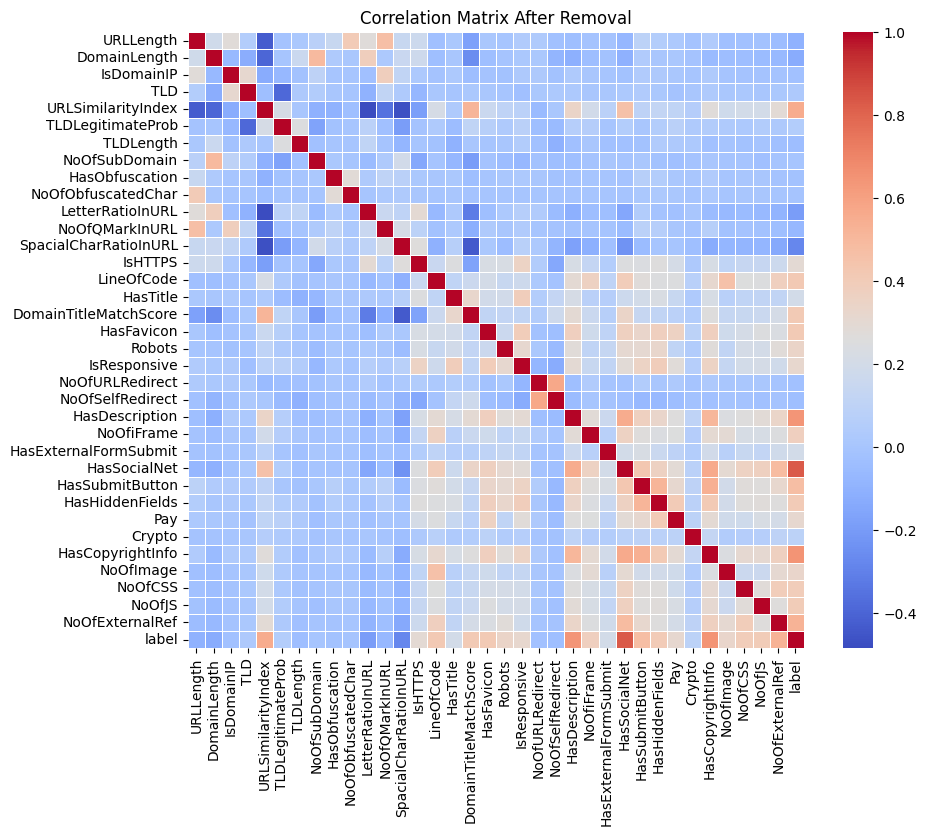

In [32]:
# Calculate the correlation matrix after removing highly correlated features
correlation_matrix_after = dfd.corr()

# Plot the correlation matrix after removal
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_after, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix After Removal')
plt.savefig('Correlation Matrix After Removal.png')
#show in png format
plt.imshow(plt.imread('Correlation Matrix After Removal.png'))
#plt.axis('off')  # Optionally turn off axis
plt.show()

In [33]:
print(df.columns)


Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'TLDLegitimateProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'LetterRatioInURL', 'NoOfQMarkInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'HasTitle',
       'DomainTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage',
       'NoOfCSS', 'NoOfJS', 'NoOfExternalRef', 'label'],
      dtype='object')


##handle fitur ke label dengan threshold 0.5 keatas

---



In [34]:
# 1. Hitung korelasi terhadap label (exclude 'label' sebagai kolom)
correlation_with_label = df.drop(columns='label').corrwith(df['label']).sort_values(ascending=False)

# 2. Threshold korelasi tinggi (ubah jika perlu)
threshold = 0.5

# 3. Ambil nama kolom yang korelasinya > threshold
features_to_drop = correlation_with_label[correlation_with_label > threshold].index.tolist()

# 4. Tampilkan kolom yang akan di-drop
print("Fitur dengan korelasi tinggi terhadap label:")
print(features_to_drop)

# 5. Drop fitur-fitur tersebut dari df
df = df.drop(columns=features_to_drop)

Fitur dengan korelasi tinggi terhadap label:
['HasSocialNet', 'HasCopyrightInfo', 'HasDescription', 'URLSimilarityIndex', 'NoOfExternalRef']


In [35]:
df.head(10)

,URLLength,DomainLength,IsDomainIP,TLD,TLDLegitimateProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,LetterRatioInURL,...,NoOfiFrame,HasExternalFormSubmit,HasSubmitButton,HasHiddenFields,Pay,Crypto,NoOfImage,NoOfCSS,NoOfJS,label
0,58,37,0,0,0.003638,2.0,1,0,0.0,0.759,...,0,0,0,0.0,0,0,1.000000,1.0,0.0,0
1,22,15,0,1,0.000623,4.0,1,0,0.0,0.273,...,0,0,0,0.0,0,0,2.055227,0.0,0.0,0
2,31,23,0,2,0.001502,3.0,1,0,0.0,0.484,...,0,0,0,0.0,0,0,0.000000,0.0,0.0,0
3,24,17,0,3,0.001536,2.0,1,0,0.0,0.500,...,0,0,0,0.0,0,0,0.000000,0.0,0.0,0
4,43,34,0,4,0.005977,2.0,2,0,0.0,0.698,...,0,0,0,0.0,0,0,0.000000,0.0,0.0,0
5,106,49,0,5,0.522907,3.0,1,0,0.0,0.425,...,0,0,0,0.0,0,0,0.000000,0.0,0.0,0
6,60,54,0,4,0.005977,2.0,1,0,0.0,0.767,...,0,0,0,0.0,0,0,0.000000,0.0,0.0,0
7,37,31,0,5,0.522907,3.0,1,0,0.0,0.676,...,0,0,0,0.0,0,0,0.000000,0.0,0.0,0
8,49,30,0,4,0.005977,2.0,2,0,0.0,0.673,...,0,0,0,0.0,0,0,0.000000,0.0,0.0,0
9,40,31,0,4,0.005977,2.0,1,0,0.0,0.675,...,0,0,0,0.0,0,0,0.000000,0.0,0.0,0


##split data setelah preprocessing & sebelum menggunakan SMOTE (Baseline)

In [36]:
# Misal: df sudah tersedia
X = df.drop('label', axis=1)
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#handle imbalance menggunakan SMOTE

In [37]:
print("\n🔎 Distribusi label TRAIN sebelum SMOTE:")
print(y_train.value_counts(normalize=True))


🔎 Distribusi label TRAIN sebelum SMOTE:
label
0    0.909641
1    0.090359
Name: proportion, dtype: float64


In [38]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Pisahkan fitur dan label
X2 = df.drop('label', axis=1)
y2 = df['label']

# 2. Split terlebih dahulu (sebelum SMOTE)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 3. Terapkan SMOTE hanya pada data latih
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train2, y_train2)

In [39]:
print(df['label'].value_counts())
print(df['label'].value_counts(normalize=True) * 100)

label
0    90850
1     9085
Name: count, dtype: int64
label
0    90.909091
1     9.090909
Name: proportion, dtype: float64


In [40]:
print("\n🔎 Distribusi label TRAIN setelah SMOTE:")
print(y_train_res.value_counts(normalize=True))


🔎 Distribusi label TRAIN setelah SMOTE:
label
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Pisahkan fitur dan label
# X = df.drop(columns=['label'])
# y = df['label']

# # Scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Konversi kembali ke DataFrame
# df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# df_scaled['label'] = y.values

# # Simpan hasil ke variabel lain jika diperlukan
# df_standard = df_scaled.copy()

# print("Standard scaling selesai. Data sudah dinormalisasi ke mean=0 dan std=1.")


#Metode supervised :

####scaling

In [41]:
from sklearn.preprocessing import StandardScaler

def scale_data_standard(X_train, X_test):

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [42]:
# ⬇️ Lakukan scaling sebelum skenario 3 dan 4
X_train_scaled, X_test_scaled = scale_data_standard(X_train_res, X_test2)

####tuning grid search

In [43]:
#tuning grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Param grid khusus untuk Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Skenario 4: Impute + Encode + SMOTE + Scaling + Tuning (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

dt_param_grid={
        'max_depth': [3, 5, 10, 15],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4],
        'criterion': ['gini', 'entropy']
}

nb_param_grid = {
    'var_smoothing': [
        1e-9, 3e-9,
        1e-8, 3e-8,
        1e-7, 3e-7,
        1e-6, 3e-6,
        1e-5
    ]
}

####fungsi analisa output

In [44]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, desc=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n=== {desc} ===")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return acc  # <- tambahkan return nilai akurasi



####fungsi chart perbandingan

In [45]:
import matplotlib.pyplot as plt

def plot_accuracy_comparison(accuracy_dict, model_name=""):
    plt.figure(figsize=(10, 6))

    # Hitung min, max dan margin untuk Y-axis
    min_acc = min(accuracy_dict.values())
    max_acc = max(accuracy_dict.values())
    margin = 0.0005  # Lebih kecil untuk zoom

    # Fokus zoom ke sekitar range akurasi saja
    lower_ylim = min_acc - margin
    upper_ylim = max_acc + margin

    # Buat bar chart
    bars = plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color='cornflowerblue')
    plt.ylabel("Accuracy\n")
    plt.ylim(lower_ylim, upper_ylim)

    # Tambahkan garis bantu horizontal
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Label angka di atas bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + (margin / 5), f"{height:.4f}",
                 ha='center', va='bottom', fontweight='bold', fontsize=10)

    # Judul utama di atas bar
    plt.gcf().text(0.5, 0.96, f"Perbandingan Akurasi - {model_name}",
                   ha='center', va='top', fontsize=14, fontweight='bold')

    plt.xticks(rotation=20)
    plt.tight_layout(rect=[0, 0, 1, 0.90])  # Sisakan ruang untuk judul
    plt.show()


#SKENARIO

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##Baseline (only preprocessing)


=== Skenario 1 - KNN ===
Accuracy: 0.9928453494771602
Classification Report:
               precision    recall  f1-score   support

           0     0.9957    0.9964    0.9961     18126
           1     0.9648    0.9581    0.9614      1861

    accuracy                         0.9928     19987
   macro avg     0.9803    0.9773    0.9788     19987
weighted avg     0.9928    0.9928    0.9928     19987

Confusion Matrix:
 [[18061    65]
 [   78  1783]]

=== Skenario 1 - Random Forest ===
Accuracy: 0.9988992845349477
Classification Report:
               precision    recall  f1-score   support

           0     0.9990    0.9998    0.9994     18126
           1     0.9984    0.9898    0.9941      1861

    accuracy                         0.9989     19987
   macro avg     0.9987    0.9948    0.9967     19987
weighted avg     0.9989    0.9989    0.9989     19987

Confusion Matrix:
 [[18123     3]
 [   19  1842]]

=== Skenario 1 - Decision Tree ===
Accuracy: 0.9975484064642017
Classificatio

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:29:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Skenario 1 - XGBoost ===
Accuracy: 0.9992995447040577
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     18126
           1     0.9978    0.9946    0.9962      1861

    accuracy                         0.9993     19987
   macro avg     0.9986    0.9972    0.9979     19987
weighted avg     0.9993    0.9993    0.9993     19987

Confusion Matrix:
 [[18122     4]
 [   10  1851]]

=== Skenario 1 - Naive Bayes ===
Accuracy: 0.96147495872317
Classification Report:
               precision    recall  f1-score   support

           0     0.9980    0.9595    0.9783     18126
           1     0.7130    0.9812    0.8259      1861

    accuracy                         0.9615     19987
   macro avg     0.8555    0.9703    0.9021     19987
weighted avg     0.9715    0.9615    0.9641     19987

Confusion Matrix:
 [[17391   735]
 [   35  1826]]


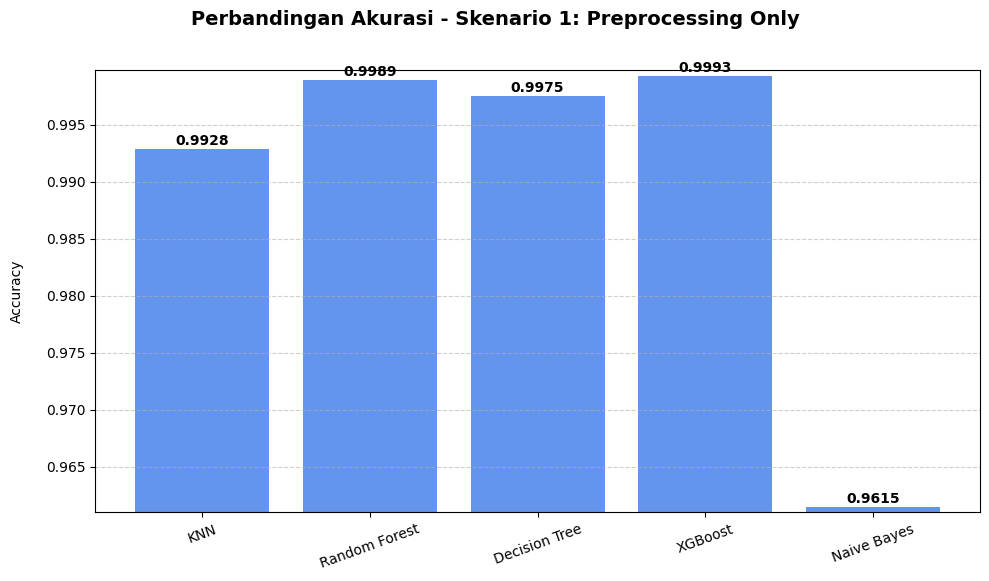

In [47]:
accuracy_results = {}

# KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
acc_knn = train_and_evaluate(model_knn, X_train, y_train, X_test, y_test, desc="Skenario 1 - KNN")
accuracy_results["KNN"] = acc_knn

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
acc_rf = train_and_evaluate(model_rf, X_train, y_train, X_test, y_test, desc="Skenario 1 - Random Forest")
accuracy_results["Random Forest"] = acc_rf

# Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
acc_dt = train_and_evaluate(model_dt, X_train, y_train, X_test, y_test, desc="Skenario 1 - Decision Tree")
accuracy_results["Decision Tree"] = acc_dt

# XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
acc_xgb = train_and_evaluate(model_xgb, X_train, y_train, X_test, y_test, desc="Skenario 1 - XGBoost")
accuracy_results["XGBoost"] = acc_xgb

# Naive Bayes
model_nb = GaussianNB()
acc_nb = train_and_evaluate(model_nb, X_train, y_train, X_test, y_test, desc="Skenario 1 - Naive Bayes")
accuracy_results["Naive Bayes"] = acc_nb

plot_accuracy_comparison(accuracy_results, model_name="Skenario 1: Preprocessing Only")


##Preprocessing + SMOTE


=== Skenario 2 - KNN ===
Accuracy: 0.9913944063641367
Classification Report:
               precision    recall  f1-score   support

           0     0.9984    0.9921    0.9952     18126
           1     0.9272    0.9850    0.9552      1861

    accuracy                         0.9914     19987
   macro avg     0.9628    0.9885    0.9752     19987
weighted avg     0.9918    0.9914    0.9915     19987

Confusion Matrix:
 [[17982   144]
 [   28  1833]]

=== Skenario 2 - Random Forest ===
Accuracy: 0.9993996097463351
Classification Report:
               precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     18126
           1     0.9984    0.9952    0.9968      1861

    accuracy                         0.9994     19987
   macro avg     0.9989    0.9975    0.9982     19987
weighted avg     0.9994    0.9994    0.9994     19987

Confusion Matrix:
 [[18123     3]
 [    9  1852]]

=== Skenario 2 - Decision Tree ===
Accuracy: 0.9978486015910342
Classificatio

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:30:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Skenario 2 - XGBoost ===
Accuracy: 0.9992995447040577
Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9996    0.9996     18126
           1     0.9957    0.9968    0.9962      1861

    accuracy                         0.9993     19987
   macro avg     0.9977    0.9982    0.9979     19987
weighted avg     0.9993    0.9993    0.9993     19987

Confusion Matrix:
 [[18118     8]
 [    6  1855]]

=== Skenario 2 - Naive Bayes ===
Accuracy: 0.9538199829889428
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9496    0.9739     18126
           1     0.6697    0.9946    0.8004      1861

    accuracy                         0.9538     19987
   macro avg     0.8346    0.9721    0.8872     19987
weighted avg     0.9687    0.9538    0.9577     19987

Confusion Matrix:
 [[17213   913]
 [   10  1851]]


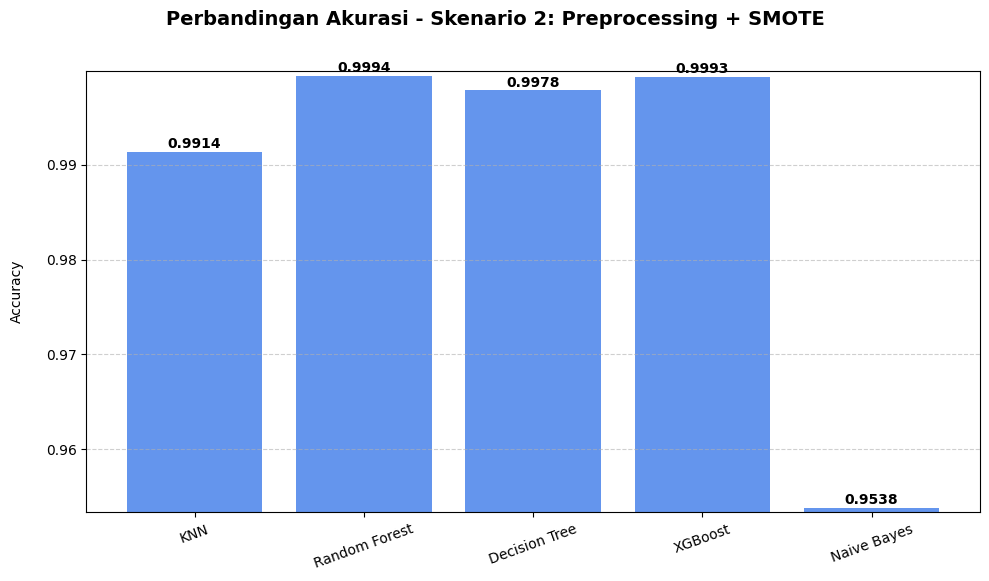

In [48]:
accuracy_results = {}

# KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
acc_knn = train_and_evaluate(model_knn, X_train_res, y_train_res, X_test2, y_test2, desc="Skenario 2 - KNN")
accuracy_results["KNN"] = acc_knn

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
acc_rf = train_and_evaluate(model_rf, X_train_res, y_train_res, X_test2, y_test2, desc="Skenario 2 - Random Forest")
accuracy_results["Random Forest"] = acc_rf

# Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
acc_dt = train_and_evaluate(model_dt, X_train_res, y_train_res, X_test2, y_test2, desc="Skenario 2 - Decision Tree")
accuracy_results["Decision Tree"] = acc_dt

# XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
acc_xgb = train_and_evaluate(model_xgb, X_train_res, y_train_res, X_test2, y_test2, desc="Skenario 2 - XGBoost")
accuracy_results["XGBoost"] = acc_xgb

# Naive Bayes
model_nb = GaussianNB()
acc_nb = train_and_evaluate(model_nb, X_train_res, y_train_res, X_test2, y_test2, desc="Skenario 2 - Naive Bayes")
accuracy_results["Naive Bayes"] = acc_nb

plot_accuracy_comparison(accuracy_results, model_name="Skenario 2: Preprocessing + SMOTE")


##Preprocessing + SMOTE + Scaling


=== Skenario 3 - KNN ===
Accuracy: 0.9925451543503278
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9924    0.9959     18126
           1     0.9306    0.9941    0.9613      1861

    accuracy                         0.9925     19987
   macro avg     0.9650    0.9932    0.9786     19987
weighted avg     0.9930    0.9925    0.9927     19987

Confusion Matrix:
 [[17988   138]
 [   11  1850]]

=== Skenario 3 - Random Forest ===
Accuracy: 0.9993996097463351
Classification Report:
               precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     18126
           1     0.9984    0.9952    0.9968      1861

    accuracy                         0.9994     19987
   macro avg     0.9989    0.9975    0.9982     19987
weighted avg     0.9994    0.9994    0.9994     19987

Confusion Matrix:
 [[18123     3]
 [    9  1852]]

=== Skenario 3 - Decision Tree ===
Accuracy: 0.9977985690698954
Classificatio

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Skenario 3 - XGBoost ===
Accuracy: 0.9992995447040577
Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9996    0.9996     18126
           1     0.9957    0.9968    0.9962      1861

    accuracy                         0.9993     19987
   macro avg     0.9977    0.9982    0.9979     19987
weighted avg     0.9993    0.9993    0.9993     19987

Confusion Matrix:
 [[18118     8]
 [    6  1855]]

=== Skenario 3 - Naive Bayes ===
Accuracy: 0.7684995246910492
Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.7450    0.8537     18126
           1     0.2865    0.9973    0.4451      1861

    accuracy                         0.7685     19987
   macro avg     0.6431    0.8712    0.6494     19987
weighted avg     0.9332    0.7685    0.8157     19987

Confusion Matrix:
 [[13504  4622]
 [    5  1856]]


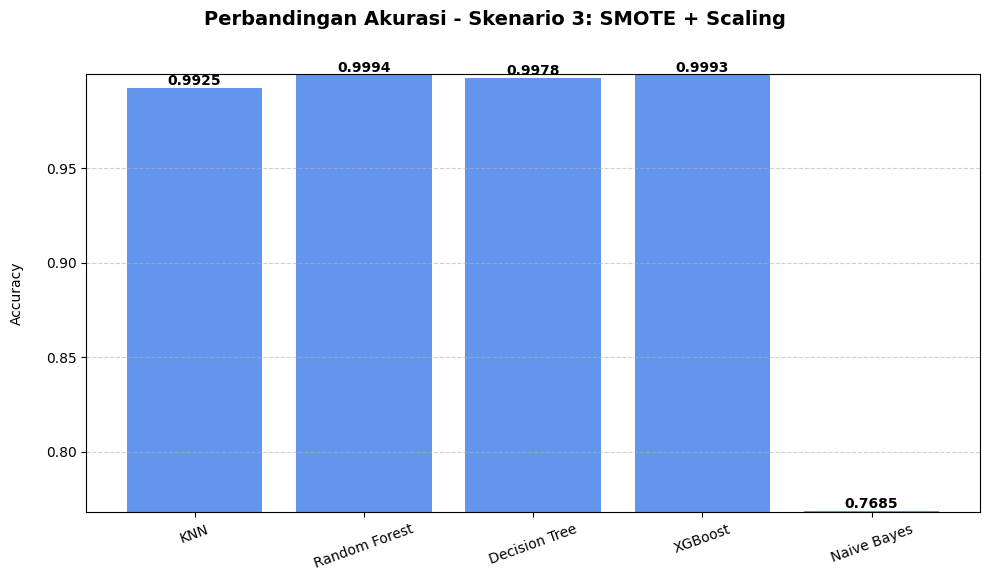

In [49]:
accuracy_results = {}

# KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
acc_knn = train_and_evaluate(model_knn, X_train_scaled, y_train_res, X_test_scaled, y_test2, desc="Skenario 3 - KNN")
accuracy_results["KNN"] = acc_knn

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
acc_rf = train_and_evaluate(model_rf, X_train_scaled, y_train_res, X_test_scaled, y_test2, desc="Skenario 3 - Random Forest")
accuracy_results["Random Forest"] = acc_rf

# Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
acc_dt = train_and_evaluate(model_dt, X_train_scaled, y_train_res, X_test_scaled, y_test2, desc="Skenario 3 - Decision Tree")
accuracy_results["Decision Tree"] = acc_dt

# XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
acc_xgb = train_and_evaluate(model_xgb, X_train_scaled, y_train_res, X_test_scaled, y_test2, desc="Skenario 3 - XGBoost")
accuracy_results["XGBoost"] = acc_xgb

# Naive Bayes
model_nb = GaussianNB()
acc_nb = train_and_evaluate(model_nb, X_train_scaled, y_train_res, X_test_scaled, y_test2, desc="Skenario 3 - Naive Bayes")
accuracy_results["Naive Bayes"] = acc_nb

plot_accuracy_comparison(accuracy_results, model_name="Skenario 3: SMOTE + Scaling")


##All steps + Tuning

Fitting 3 folds for each of 12 candidates, totalling 36 fits

=== Skenario 4 - KNN ===
Accuracy: 0.9967979186471206
Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9974    0.9982     18126
           1     0.9746    0.9914    0.9830      1861

    accuracy                         0.9968     19987
   macro avg     0.9869    0.9944    0.9906     19987
weighted avg     0.9968    0.9968    0.9968     19987

Confusion Matrix:
 [[18078    48]
 [   16  1845]]
Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Fitting 3 folds for each of 48 candidates, totalling 144 fits

=== Skenario 4 - RF ===
Accuracy: 0.9994496422674739
Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     18126
           1     0.9973    0.9968    0.9970      1861

    accuracy                         0.9994     19987
   macro avg     0.9985    0.9983    0.9984

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Skenario 4 - XGB ===
Accuracy: 0.9994996747886126
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9997    0.9997     18126
           1     0.9968    0.9979    0.9973      1861

    accuracy                         0.9995     19987
   macro avg     0.9983    0.9988    0.9985     19987
weighted avg     0.9995    0.9995    0.9995     19987

Confusion Matrix:
 [[18120     6]
 [    4  1857]]
Best XGB Params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Fitting 3 folds for each of 9 candidates, totalling 27 fits

=== Skenario 4 - NB ===
Accuracy: 0.8398959323560314
Classification Report:
               precision    recall  f1-score   support

           0     0.9995    0.8239    0.9032     18126
           1     0.3673    0.9957    0.5366      1861

    accuracy                         0.8399     19987
   macro avg     0.6834    0.9098    0.7199     19987
we

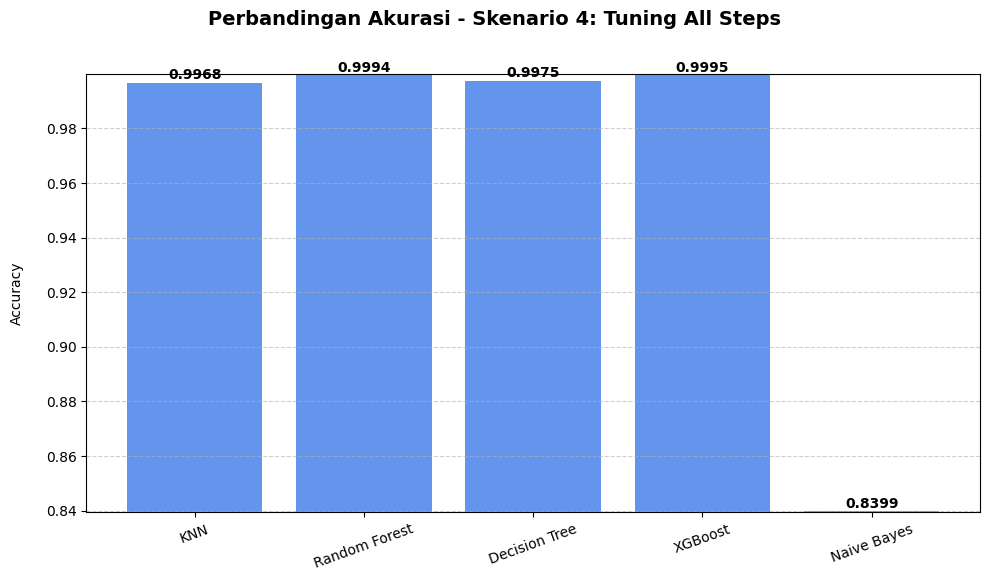

In [50]:
accuracy_results = {}

# KNN
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
grid_knn.fit(X_train_scaled, y_train_res)
best_knn = grid_knn.best_estimator_
acc_knn = train_and_evaluate(best_knn, X_train_scaled, y_train_res, X_test_scaled, y_test2, desc="Skenario 4 - KNN")
accuracy_results["KNN"] = acc_knn
print("Best KNN Params:", grid_knn.best_params_)

# Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
grid_rf.fit(X_train_scaled, y_train_res)
best_rf = grid_rf.best_estimator_
acc_rf = train_and_evaluate(best_rf, X_train_scaled, y_train_res, X_test_scaled, y_test2, desc="Skenario 4 - RF")
accuracy_results["Random Forest"] = acc_rf
print("Best RF Params:", grid_rf.best_params_)

# Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
grid_dt.fit(X_train_scaled, y_train_res)
best_dt = grid_dt.best_estimator_
acc_dt = train_and_evaluate(best_dt, X_train_scaled, y_train_res, X_test_scaled, y_test2, desc="Skenario 4 - DT")
accuracy_results["Decision Tree"] = acc_dt
print("Best DT Params:", grid_dt.best_params_)

# XGBoost
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
grid_xgb.fit(X_train_scaled, y_train_res)
best_xgb = grid_xgb.best_estimator_
acc_xgb = train_and_evaluate(best_xgb, X_train_scaled, y_train_res, X_test_scaled, y_test2, desc="Skenario 4 - XGB")
accuracy_results["XGBoost"] = acc_xgb
print("Best XGB Params:", grid_xgb.best_params_)

# Naive Bayes
grid_nb = GridSearchCV(GaussianNB(), nb_param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
grid_nb.fit(X_train_scaled, y_train_res)
best_nb = grid_nb.best_estimator_
acc_nb = train_and_evaluate(best_nb, X_train_scaled, y_train_res, X_test_scaled, y_test2, desc="Skenario 4 - NB")
accuracy_results["Naive Bayes"] = acc_nb
print("Best NB Params:", grid_nb.best_params_)

plot_accuracy_comparison(accuracy_results, model_name="Skenario 4: Tuning All Steps")
